In [9]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% load packages
pkg load statistics

% end of housekeeping

# simultaneous differential equations


These notes are based on a tutorial written by Sherry Towers

http://sherrytowers.com/2012/12/11/compartmental-modelling-without-calculus/

https://sherrytowers.com/2012/12/11/simple-epidemic-modelling-with-an-sir-model/

For time dependent processes in particular, called dynamic processes, it is often necessary to solve simultaneous differential equations.  For example, wastewater treatment plant simulators such as BioWin (https://envirosim.com/products) utilize simultaneous differential equations to design and test and operate wastewater treatment plants.

Such models are often called "box" or "compartment" models.  Where we consider flows from one box to another box.  We can track the flows as well as the time-dependent amount in each box.  Using such models, we could model flow of a nutrient or contaminant through compartments in a lake (sediment, water column, biota, ...).  Models predicting climate change are dynamic models.  So are models predicting the current pandemic. 

For this demonstration we will consider the SIR model.

### SIR model

The Susceptible, Infected, Recovered (SIR) model predicts the evolution of an infections disease through a population.  A simple exponential growth model will fail because the real rate will decrease as the recovered portion of the population is no longer susceptible to the disease.

So consider a total population $N$.  The poplulation can be divided into susceptible ($S$), infected ($I$) and recovered ($R$) individuals.  We consider the time dependent flow from susceptible to infected to recovered and track the "content" of these "boxes" versus time.

The simultaneous differential equations are 

$$
\dfrac{dS}{dt}= \dfrac{-\beta I S}{N}\\
\dfrac{dI}{dt}=\dfrac{\beta I S}{N} - \gamma I\\
\dfrac{R}{dt}=\gamma I
$$

We will code without using calculus (using $\Delta$ instead) and then code using delta.


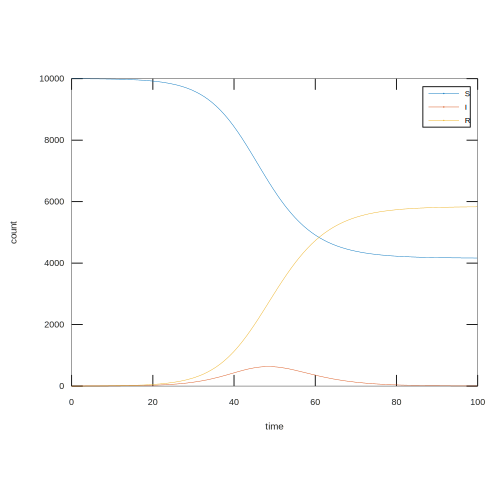

In [10]:
%plot -s 500,500 -f 'svg'

delta_t=0.1; %days. small timestep is imporant
N=10000; endtime=1000; time=zeros(1,endtime);
S=zeros(1,endtime); I=zeros(1,endtime); R=zeros(1,endtime); %initialize
gamma=1/3; % recovery time in 1/days (1/gamma is the avg recovery time)
beta=0.5; % transmission rate
S=N-1; I=1; %start of pandemic

for i=2:endtime
S(i)= S(i-1) - (beta*S(i-1)*I(i-1)/N)*delta_t; 
I(i) = I(i-1) + (beta*S(i-1)*I(i-1)/N-gamma*I(i-1))*delta_t;
R(i) = N-S(i)-I(i);
time(i)=time(i-1)+delta_t;
end

plot(time,S,time,I,time,R)
legend('S','I','R');
xlabel('time'); ylabel('count')


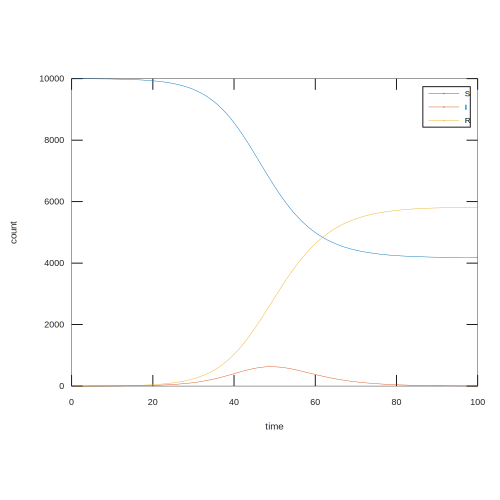

In [12]:
% now solve using differential equations
%first define the simultaneous DE

function  dNdt  = SIR(t,y,beta,gamma,N)
%y entries in order is S, I, R %N entries in order is S, I, R
dNdt(1) = -beta*y(1)*y(2)/N;
dNdt(2) = beta*y(1)*y(2)/N-gamma*y(2);
dNdt(3) = gamma*y(2);
dNdt = dNdt(:);
end

Y0=[S(1) I(1) R(1)]; time=1:1:100;
options = odeset('RelTol',1e-6,'AbsTol',1e-6);
[t, y] = ode45(@(t,y) SIR(t,y,beta,gamma,N),time,Y0,options);

plot(t,y)

legend('S','I','R');
xlabel('time'); ylabel('count')
